<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°05


## Problema 01

<img src="https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png" width = "500" align="center"/>


El **Iris dataset** es un conjunto de datos que contiene muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midieron cuatro características en cada muestra: el largo y ancho del sépalo y del pétalo, ambos en centímetros. Este conjunto de datos es comúnmente utilizado para análisis de clasificación y para demostrar algoritmos de machine learning en la ciencia de datos.

### Descripción de los Datos:

1. **sepal_length**: Largo del sépalo en centímetros.
2. **sepal_width**: Ancho del sépalo en centímetros.
3. **petal_length**: Largo del pétalo en centímetros.
4. **petal_width**: Ancho del pétalo en centímetros.
5. **species**: La especie de la flor (Iris setosa, Iris virginica, Iris versicolor).

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:



In [2]:
# librerias

import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [13]:
# cargar datos
data= pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2024/main/docs/labs/data/iris_contaminados.csv")

data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del Experimento

El primer paso en el análisis es identificar las variables clave del estudio y definir su naturaleza:

* **species**:
    * **Descripción**: Nombre de la especie de Iris a la que pertenece cada observación.
    * **Tipo de dato**: *string*.
    * **Restricciones**: Solo se consideran tres especies (Iris setosa, Iris virginica, e Iris versicolor).
* **sepalLength**:
    * **Descripción**: Longitud del sépalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores oscilan entre 4.0 cm y 7.0 cm.
* **sepalWidth**:
    * **Descripción**: Ancho del sépalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores varían entre 2.0 cm y 4.5 cm.
* **petalLength**:
    * **Descripción**: Longitud del pétalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores están comprendidos entre 1.0 cm y 7.0 cm.
* **petalWidth**:
    * **Descripción**: Ancho del pétalo en centímetros.
    * **Tipo de dato**: *float*.
    * **Rango**: Los valores se encuentran entre 0.1 cm y 2.5 cm.

Esta descripción clara de las variables y sus limitaciones es esencial para establecer una base sólida en el análisis de datos.

Su objetivo es realizar un **Análisis Exploratorio de Datos (EDA)** completo y riguroso. Para lograrlo, siga las instrucciones proporcionadas a continuación, asegurándose de extraer conclusiones intermedias después de cada pregunta, y de elaborar una conclusión general al finalizar todas las preguntas.

 Esto le permitirá identificar patrones, anomalías y relaciones clave entre las variables antes de proceder con un análisis más profundo.

1. Realice un conteo de los elementos en la columna **species** y ajuste cualquier valor que considere incorrecto. Reemplace los valores `NaN` con "default".

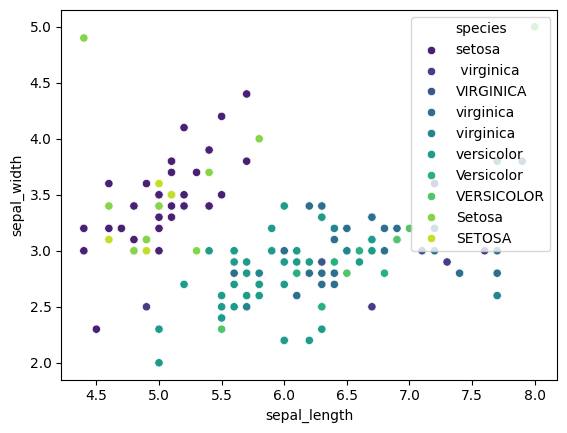

In [14]:
sns.scatterplot(data=data,x='sepal_length',y='sepal_width',hue='species',palette='viridis')
plt.show()

Desde el grafico es claro que hace falta manejar los datos para responder a la pregunta.

In [15]:
data['species'].value_counts()
data['species'].unique()

array(['setosa', ' virginica', 'VIRGINICA', 'virginica', 'virginica ',
       'versicolor', 'Versicolor', 'VERSICOLOR', nan, 'Setosa', 'SETOSA'],
      dtype=object)

Nos damos cuenta que la columna species no tiene el formato adecuado y hay datos vacios

In [23]:
#arreglamos los datos
data['species']=data['species'].str.lower().str.strip().fillna('default')

2. Genere un gráfico de box-plot para visualizar la distribución del largo y ancho de los pétalos y sépalos. Antes de crear el gráfico, reemplace los valores `NaN` por **0**.

In [25]:
data.isna().sum() #cuanto elementos vacios hay
for col in data.columns:
  data[col]=data[col].fillna(0)
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Ahora las columnas correspondientes al ancho y largo de sepalo y petalo estan en el formato adecuado, es decir, float. En este caso no se dropean los nan, pues, son mas que el caso anterior.

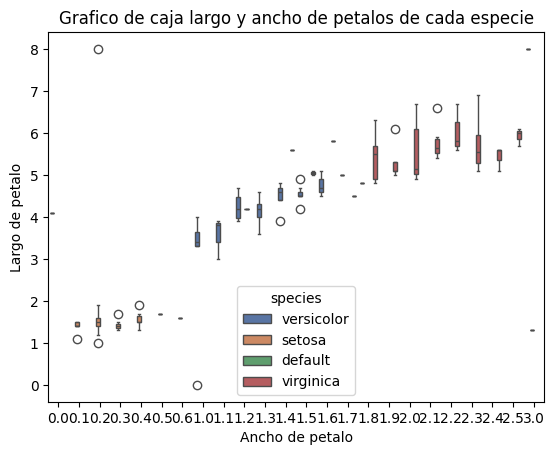

In [26]:
sns.boxplot(data=data,x='petal_width',y='petal_length',hue='species',palette='deep')
plt.title('Grafico de caja largo y ancho de petalos de cada especie')
plt.xlabel('Ancho de petalo')
plt.ylabel('Largo de petalo')

plt.show()

De este grafico al menos sabemos que parece ser que el ancho y largo del petalo es representativo de cada especie. Cada especie tiene un cluster de cajas.

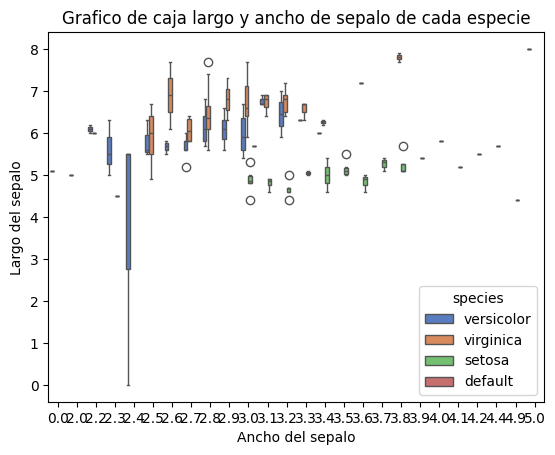

In [27]:
sns.boxplot(data=data,x='sepal_width',y='sepal_length',hue='species',palette='muted')
plt.title('Grafico de caja largo y ancho de sepalo de cada especie')
plt.xlabel('Ancho del sepalo')
plt.ylabel('Largo del sepalo')
plt.show()

A diferencia de las caracteristicas de los petalos. El largo y ancho de sepalo de cada especie no parece servir para diferenciar cada especia, pues, 2 de ellas tienen la proporcion ancho y largo similares.

3. Utilizando los rangos de valores válidos previamente definidos para el largo y ancho de los pétalos y sépalos, agregue una nueva columna denominada **label**. Esta columna debe identificar si algún valor se encuentra fuera del rango permitido. Marque los valores fuera de rango con "fuera de rango" y los valores dentro del rango con "dentro del rango".

In [28]:
mask_largo_sepalo=data['sepal_length'].between(4.0,7.0)
mask_ancho_sepalo=data['sepal_width'].between(2.0,4.5)
mask_largo_petalo=data['petal_length'].between(1.0,7.0)
mask_ancho_petalo=data['petal_width'].between(0.1, 2.5)
data.loc[mask_largo_sepalo & mask_ancho_sepalo & mask_largo_petalo & mask_ancho_petalo,'label']='dentro del rango'
data.loc[~(mask_largo_sepalo & mask_ancho_sepalo & mask_largo_petalo & mask_ancho_petalo),'label'] = 'fuera del rango'
data['label'].value_counts()

,count
label,
dentro del rango,129
fuera del rango,21


Nos damos cuenta que la mayorio de los datos si esta dentro del rango solicitado para el estudio, es decir, hacer el estudio con estos datos es pertinente.

4. Genere dos gráficos de dispersión:

   - El primero, mostrando la relación entre **sepal_length** y **petal_length**.
   - El segundo, mostrando la relación entre **sepal_width** y **petal_width**.

En ambos gráficos, los puntos deben estar categorizados por la columna **label** (es decir, "dentro del rango" o "fuera del rango").

Concluya los resultados evaluando la relación entre las variables y si los valores fuera de rango afectan significativamente la distribución o comportamiento de los datos.

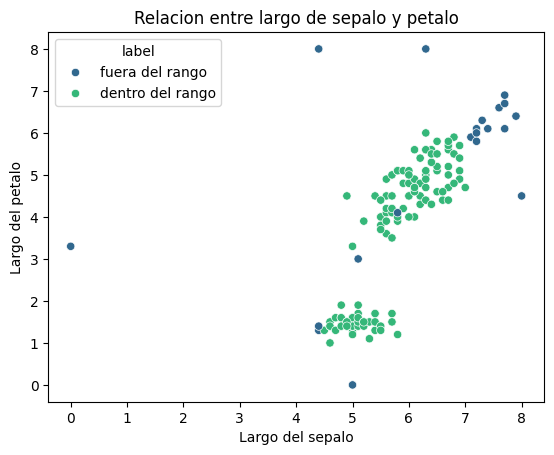

In [29]:
# grafico de dispersion entre largo de sepalo y petalo
sns.scatterplot(data=data,x='sepal_length',y='petal_length',hue='label',palette='viridis')
plt.title('Relacion entre largo de sepalo y petalo')
plt.xlabel('Largo del sepalo')
plt.ylabel('Largo del petalo')
plt.show()

La mayoria de los datos fuera del rango se encuentra alejado de los clusters de los elementos dentro del rango. Asi, por lo menos en este caso, los datos de fuera de rango no son representativos

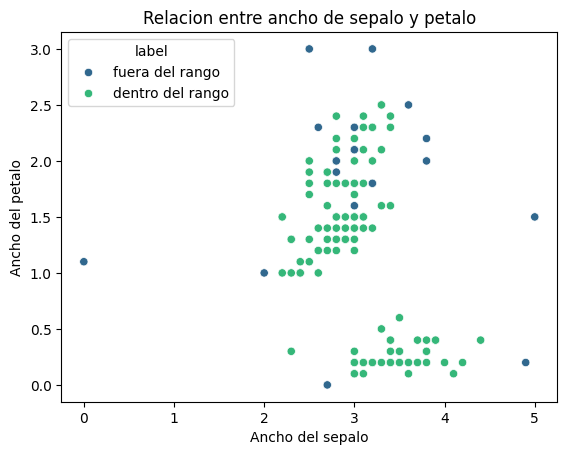

In [30]:
# grafico de dispersion entre largo de sepalo y petalo
sns.scatterplot(data=data,x='sepal_width',y='petal_width',hue='label',palette='viridis')
plt.title('Relacion entre ancho de sepalo y petalo')
plt.xlabel('Ancho del sepalo')
plt.ylabel('Ancho del petalo')
plt.show()

Caso contrario al anterior. Los datos son menos y los datos que estan fuera del rango estan mas cerca que los datos dentro del rango. De donde no se sabria concluir que no son representativos.

5. Filtre los datos para conservar solo aquellos que estén dentro del rango válido. Luego, genere un gráfico de dispersión mostrando la relación entre **sepal_length** y **petal_length**, categorizando los puntos por la columna **species**. Esto permitirá visualizar cómo varían estas dimensiones entre las diferentes especies de Iris.

In [33]:
data.drop(data[data['label'] == 'fuera del rango'].index, inplace=True) #eliminando todas las filas que contengan "fuera del rango" en "label"

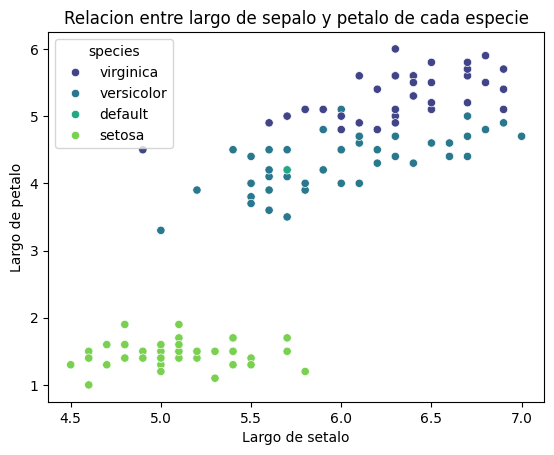

In [34]:
sns.scatterplot(data=data,x='sepal_length',y='petal_length',hue='species',palette='viridis')
plt.title('Relacion entre largo de sepalo y petalo de cada especie')
plt.xlabel('Largo de setalo')
plt.ylabel('Largo de petalo')
plt.show()

Del grafico podemos ver que la especie Setosa es la que mas se diferencia del las otras 2, ademas, las especies virginica y versicolor no parecen variar demasiado entre ellas, al menos, respecto al largo de petalo y setalo

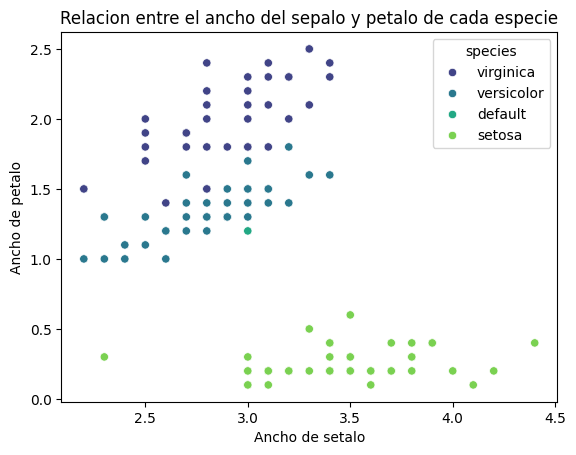

In [35]:
sns.scatterplot(data=data,x='sepal_width',y='petal_width',hue='species',palette='viridis')
plt.title('Relacion entre el ancho del sepalo y petalo de cada especie')
plt.xlabel('Ancho de setalo')
plt.ylabel('Ancho de petalo')
plt.show()

Segun el grafico, la relacion de ancho de petalo y sepalo es la misma que la relacion del largo petalo y sepalo.